# Import required libraries

In [1]:
!pip install folium
import geopy
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import folium
from geopy.geocoders import Nominatim
!pip install geocoder
import geocoder
import urllib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

     |████████████████████████████████| 92kB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 102kB 7.7MB/s ta 0:00:011


## Create a map of chicago

In [2]:
address = 'Chicago, IL'
geolocator = Nominatim(user_agent = 'ca_agent')
ca_latlong = geolocator.geocode(address)
ca_lat = ca_latlong.latitude
ca_long = ca_latlong.longitude
ca_map = folium.Map(location = [ca_lat,ca_long], zoom_start = 12)

## Scrape community areas and get the coordinates

In [3]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago').text
soup = BeautifulSoup(source, 'lxml')
table = soup.findAll('table')[0]
df = pd.read_html(str(table))[0]
df.drop(columns = ['Neighborhood'])
ngb = df['Neighborhood']
long = []
lat = []
for n in ngb:
    g = geocoder.arcgis('{}, Chicago, Illinois'.format(n))
    ngb_latlong = g.latlng
    long.append(ngb_latlong[1])
    lat.append(ngb_latlong[0])
long_series = pd.Series(long)
lat_series = pd.Series(lat)
frame = {'Neighborhood': ngb ,'Latitude': lat_series , 'Longitude': long_series }
df1 = pd.DataFrame(frame)
res = pd.merge(df,df1, on = 'Neighborhood')
res

,Neighborhood,Community area,Latitude,Longitude
0,Albany Park,Albany Park,41.968290,-87.723380
1,Altgeld Gardens,Riverdale,41.654410,-87.602250
2,Andersonville,Edgewater,41.980460,-87.668340
3,Archer Heights,Archer Heights,41.811540,-87.725560
4,Armour Square,Armour Square,41.834580,-87.631890
5,Ashburn,Ashburn,41.747850,-87.709950
6,Ashburn Estates,Ashburn,41.941674,-88.198809
7,Auburn Gresham,Auburn Gresham,41.743190,-87.655040
8,Avalon Park,Avalon Park,41.745070,-87.588160
9,Avondale,Avondale,41.939250,-87.711250


In [4]:
res.drop(columns = ['Neighborhood'], inplace = True)

In [5]:
res.drop_duplicates()

,Community area,Latitude,Longitude
0,Albany Park,41.968290,-87.723380
1,Riverdale,41.654410,-87.602250
2,Edgewater,41.980460,-87.668340
3,Archer Heights,41.811540,-87.725560
4,Armour Square,41.834580,-87.631890
5,Ashburn,41.747850,-87.709950
6,Ashburn,41.941674,-88.198809
7,Auburn Gresham,41.743190,-87.655040
8,Avalon Park,41.745070,-87.588160
9,Avondale,41.939250,-87.711250


## Data cleaning and data wrangling

In [6]:
sociodf = pd.read_csv("https://ibm.box.com/shared/static/05c3415cbfbtfnr2fx4atenb2sd361ze.csv")
crimedf = pd.read_csv("https://ibm.box.com/shared/static/svflyugsr9zbqy5bmowgswqemfpm1x7f.csv")

In [7]:
col = ['PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY','PERCENT AGED 16+ UNEMPLOYED','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PERCENT AGED UNDER 18 OR OVER 64','PER_CAPITA_INCOME ']
sociodf.drop(columns = col, inplace = True)      

### Normalizing the hardship index column

I'm using max-min normalization.

In [8]:
sociodf['HARDSHIP_INDEX']=(sociodf['HARDSHIP_INDEX']-sociodf['HARDSHIP_INDEX'].min())/(sociodf['HARDSHIP_INDEX'].max()-sociodf['HARDSHIP_INDEX'].min())

In [9]:
sociodf.rename(columns={"COMMUNITY_AREA_NAME": "Community area", "HARDSHIP_INDEX": "hardship index"}, inplace=True)
sociodf.head()

,COMMUNITY_AREA_NUMBER,Community area,hardship index
0,1.0,Rogers Park,0.391753
1,2.0,West Ridge,0.463918
2,3.0,Uptown,0.195876
3,4.0,Lincoln Square,0.164948
4,5.0,North Center,0.051546


In [10]:
sociodf.shape

(78, 3)

In [11]:
res1 = pd.merge(res,sociodf,on = 'Community area')
res1.drop_duplicates(keep='first',subset = ['Community area'],inplace=True)
res1.head()

,Community area,Latitude,Longitude,COMMUNITY_AREA_NUMBER,hardship index
0,Albany Park,41.96829,-87.72338,14.0,0.536082
4,Riverdale,41.65441,-87.60225,54.0,1.000000
8,Edgewater,41.98046,-87.66834,77.0,0.185567
13,Archer Heights,41.81154,-87.72556,57.0,0.680412
14,Armour Square,41.83458,-87.63189,34.0,0.835052


In [12]:
res1 = res1[res1['hardship index'] != 0.000000]

In [13]:
crimedf.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,UPDATEDON,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,14.0,58.0,6,1155838.0,1873050.0,2004,02/10/2018 03:50:01 PM,41.807441,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,27.0,23.0,6,1152206.0,1906127.0,2004,02/28/2018 03:56:25 PM,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,3.0,38.0,6,1177436.0,1876313.0,2011,02/10/2018 03:50:01 PM,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,6,1194622.0,1850125.0,2010,02/10/2018 03:50:01 PM,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,15.0,66.0,6,1155240.0,1860661.0,2016,02/10/2018 03:50:01 PM,41.773455,-87.706480,"(41.773455295, -87.706480471)"


### Getting the count of total crimes in each area

In [14]:
crimedf1 = crimedf.groupby('COMMUNITY_AREA_NUMBER').count()

In [15]:
for col in crimedf1.columns:
    if (col != 'CASE_NUMBER'):
        crimedf1.drop(columns = col, inplace = True)

### Merging all the datasets into a single pandas dataframe

In [16]:
crimedf1.rename(columns={"CASE_NUMBER": "Total crimes"}, inplace=True)
res_df = pd.merge(res1,crimedf1, on = 'COMMUNITY_AREA_NUMBER')

In [17]:
res_df.head()

,Community area,Latitude,Longitude,COMMUNITY_AREA_NUMBER,hardship index,Total crimes
0,Albany Park,41.96829,-87.72338,14.0,0.536082,5
1,Riverdale,41.65441,-87.60225,54.0,1.000000,2
2,Edgewater,41.98046,-87.66834,77.0,0.185567,2
3,Ashburn,41.74785,-87.70995,70.0,0.371134,8
4,Auburn Gresham,41.74319,-87.65504,71.0,0.752577,14


## Plotting the community areas on Chicago city's map

In [18]:
for lat,lng,ngbh in zip(res_df['Latitude'], res_df['Longitude'], res_df['Community area']):
    label = '{}'.format(ngbh)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup = label,
    color = 'blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(ca_map)
ca_map

#### Define Foursquare Credentials and Version

In [19]:
LIMIT = 100
RADIUS = 10000
CLIENT_ID = 'XGTTY3F1R2SG4JQ4BQNN5KUQK0HNKOUWRKSYPGO3Q3OMW1DI' # your Foursquare ID
CLIENT_SECRET = 'B4ZG32CPPGC4M1GBMC50XWY1W3WS2GRUMMOQ2NZMYZQRWFVI' # your Foursquare Secret
VERSION = '20200210'

## Explore Neighborhoods in Chicago
#### Create a function to get venues near all the neighborhoods in Chicago

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',  
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

#### Access all bars nearby the community areas

In [24]:
#bar = 4bf58dd8d48988d116941735
ca_bars = getNearbyVenues(names=res_df['Community area'], latitudes=res_df['Latitude'], longitudes=res_df['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d116941735')

In [25]:
ca_bars.rename(columns={"Neighborhood": "Community area", "Neighborhood Latitude": "Latitude", "Neighborhood Longitude": "Longitude"}, inplace=True)
ca_bars.head()

,Community area,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.96829,-87.72338,Luxe Hookah Lounge,41.968836,-87.727922,Hookah Bar
1,Albany Park,41.96829,-87.72338,Rotana Cafe,41.968806,-87.728004,Hookah Bar
2,Albany Park,41.96829,-87.72338,240 Lounge,41.968283,-87.727558,Dive Bar
3,Albany Park,41.96829,-87.72338,Goofy's Hock Shop,41.960296,-87.728441,Dive Bar
4,Albany Park,41.96829,-87.72338,T-Bone's,41.972420,-87.726018,Speakeasy


In [26]:
ca_bars.drop(columns = ['Latitude', 'Longitude'], inplace = True)
ca_bars_res = pd.merge(ca_bars,res_df, on = 'Community area')
ca_bars_res.head()

,Community area,Venue,Venue Latitude,Venue Longitude,Venue Category,Latitude,Longitude,COMMUNITY_AREA_NUMBER,hardship index,Total crimes
0,Albany Park,Luxe Hookah Lounge,41.968836,-87.727922,Hookah Bar,41.96829,-87.72338,14.0,0.536082,5
1,Albany Park,Rotana Cafe,41.968806,-87.728004,Hookah Bar,41.96829,-87.72338,14.0,0.536082,5
2,Albany Park,240 Lounge,41.968283,-87.727558,Dive Bar,41.96829,-87.72338,14.0,0.536082,5
3,Albany Park,Goofy's Hock Shop,41.960296,-87.728441,Dive Bar,41.96829,-87.72338,14.0,0.536082,5
4,Albany Park,T-Bone's,41.972420,-87.726018,Speakeasy,41.96829,-87.72338,14.0,0.536082,5


### Analyze Each Neighborhood

In [27]:
# one hot encoding
ca_bars_onehot = pd.get_dummies(ca_bars_res[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ca_bars_onehot['Community area'] = ca_bars_res['Community area']
ca_bars_onehot['Hardship index'] = ca_bars_res['hardship index']
ca_bars_onehot['Total crimes'] = ca_bars_res['Total crimes']
# move neighborhood column to the first column
fixed_columns = [ca_bars_onehot.columns[-1]] + list(ca_bars_onehot.columns[:-1])
ca_bars_onehot = ca_bars_onehot[fixed_columns]
fixed_columns = [ca_bars_onehot.columns[-1]] + list(ca_bars_onehot.columns[:-1])
ca_bars_onehot = ca_bars_onehot[fixed_columns]
fixed_columns = [ca_bars_onehot.columns[-1]] + list(ca_bars_onehot.columns[:-1])
ca_bars_onehot = ca_bars_onehot[fixed_columns]

ca_bars_onehot.head()

,Community area,Hardship index,Total crimes,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Beer Garden,...,Steakhouse,Strip Club,Sushi Restaurant,Theme Restaurant,Tiki Bar,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint
0,Albany Park,0.536082,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albany Park,0.536082,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albany Park,0.536082,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albany Park,0.536082,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albany Park,0.536082,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
ca_bars_grouped = ca_bars_onehot.groupby('Community area').mean().reset_index()
ca_bars_grouped

,Community area,Hardship index,Total crimes,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bar,Beer Bar,Beer Garden,...,Steakhouse,Strip Club,Sushi Restaurant,Theme Restaurant,Tiki Bar,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint
0,Albany Park,0.536082,5,0.047619,0.00,0.0,0.000000,0.095238,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000
1,Ashburn,0.371134,8,0.000000,0.00,0.0,0.000000,0.200000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000
2,Auburn Gresham,0.752577,14,0.000000,0.00,0.0,0.000000,0.375000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.250000,0.00,0.00,0.000000
3,Austin,0.742268,43,0.000000,0.00,0.0,0.000000,0.400000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000
4,Avalon Park,0.412371,4,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,1.000000,0.00,0.00,0.000000
5,Avondale,0.422680,6,0.000000,0.00,0.0,0.000000,0.483871,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.064516,0.00000,0.000000,0.00,0.00,0.000000
6,Belmont Cragin,0.711340,8,0.000000,0.00,0.0,0.000000,0.666667,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000
7,Beverly,0.113402,4,0.000000,0.00,0.0,0.000000,0.333333,0.000000,0.166667,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000
8,Bridgeport,0.432990,1,0.000000,0.00,0.0,0.000000,0.611111,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.055556,0.00,0.00,0.055556
9,Brighton Park,0.855670,10,0.000000,0.00,0.0,0.000000,0.750000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000


### Fuction to return top 5 most common venues

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Community area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Community area'] = ca_bars_grouped['Community area']

for ind in np.arange(ca_bars_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ca_bars_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany Park,Hookah Bar,Dive Bar,Speakeasy,Karaoke Bar,Bar
1,Ashburn,Sports Bar,Karaoke Bar,Liquor Store,Bar,Eastern European Restaurant
2,Auburn Gresham,Bar,Wine Bar,Cocktail Bar,Lounge,Dive Bar
3,Austin,Bar,Dive Bar,Pub,Gay Bar,Eastern European Restaurant
4,Avalon Park,Wine Bar,Wings Joint,General Entertainment,Eastern European Restaurant,English Restaurant


In [30]:
final_df = pd.merge(neighborhoods_venues_sorted,res_df, on = 'Community area')
final_df.drop(columns = ['Latitude', 'Longitude', 'COMMUNITY_AREA_NUMBER'], inplace=True)
final_df.head()

,Community area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,hardship index,Total crimes
0,Albany Park,Hookah Bar,Dive Bar,Speakeasy,Karaoke Bar,Bar,0.536082,5
1,Ashburn,Sports Bar,Karaoke Bar,Liquor Store,Bar,Eastern European Restaurant,0.371134,8
2,Auburn Gresham,Bar,Wine Bar,Cocktail Bar,Lounge,Dive Bar,0.752577,14
3,Austin,Bar,Dive Bar,Pub,Gay Bar,Eastern European Restaurant,0.742268,43
4,Avalon Park,Wine Bar,Wings Joint,General Entertainment,Eastern European Restaurant,English Restaurant,0.412371,4


## Clustering the community areas

#### Using elbow plot to select the optimum value of K

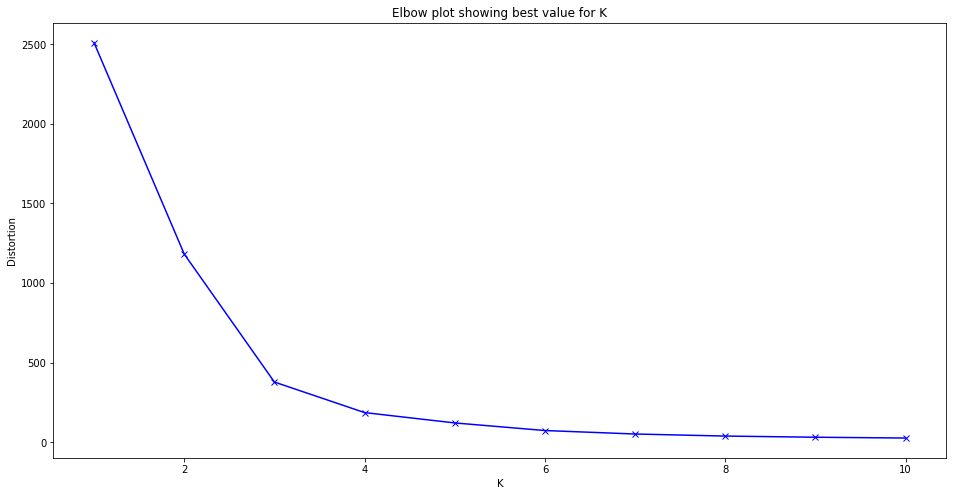

In [31]:
distortions = []
ca_clustering = ca_bars_grouped.drop('Community area', 1)
Kr = range(1,11)
for K in Kr:
    kmc = KMeans(n_clusters = K, random_state=0).fit(ca_clustering)
    distortions.append(kmc.inertia_)
plt.figure(figsize=(16,8))
plt.plot(Kr,distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow plot showing best value for K')
plt.show()

#### Using K-Means Clustering algorithm with K = 4

In [32]:
# set number of clusters
kclusters = 4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ca_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 3, 1, 2, 0, 0, 2, 2, 0], dtype=int32)

In [33]:
# add clustering labels
#neighborhoods_venues_sorted.drop(columns = ['Cluster Labels'], inplace = True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ca_merged = res_df


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ca_merged = ca_merged.join(neighborhoods_venues_sorted.set_index('Community area'), on='Community area')

ca_merged.dropna(inplace = True)

ca_merged.head() # check the last columns!



,Community area,Latitude,Longitude,COMMUNITY_AREA_NUMBER,hardship index,Total crimes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany Park,41.96829,-87.72338,14.0,0.536082,5,2.0,Hookah Bar,Dive Bar,Speakeasy,Karaoke Bar,Bar
2,Edgewater,41.98046,-87.66834,77.0,0.185567,2,2.0,Bar,Gay Bar,Speakeasy,Wine Bar,Lounge
3,Ashburn,41.74785,-87.70995,70.0,0.371134,8,0.0,Sports Bar,Karaoke Bar,Liquor Store,Bar,Eastern European Restaurant
4,Auburn Gresham,41.74319,-87.65504,71.0,0.752577,14,3.0,Bar,Wine Bar,Cocktail Bar,Lounge,Dive Bar
5,Avalon Park,41.74507,-87.58816,45.0,0.412371,4,2.0,Wine Bar,Wings Joint,General Entertainment,Eastern European Restaurant,English Restaurant


## Visualizing the clusters

In [34]:
# create map
map_clusters = folium.Map(location=[ca_lat, ca_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ca_merged['Latitude'], ca_merged['Longitude'], ca_merged['Community area'], ca_merged['Cluster Labels'].astype('int32')):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analyzing each cluster individually

### Cluster 0

In [35]:
ca_cluster0 = ca_merged.loc[ca_merged['Cluster Labels'] == 0, ca_merged.columns[[0] + list(range(4, ca_merged.shape[1]))]]
ca_cluster0

,Community area,hardship index,Total crimes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Ashburn,0.371134,8,0.0,Sports Bar,Karaoke Bar,Liquor Store,Bar,Eastern European Restaurant
6,Avondale,0.422680,6,0.0,Bar,Dive Bar,Pub,Tiki Bar,German Restaurant
7,Irving Park,0.340206,8,0.0,Bar,Karaoke Bar,Pub,Cocktail Bar,Speakeasy
8,New City,0.927835,10,0.0,Bar,Food Truck,Brewery,Wings Joint,General Entertainment
9,Belmont Cragin,0.711340,8,0.0,Bar,Cocktail Bar,Gay Bar,Wings Joint,General Entertainment
15,Lake View,0.041237,11,0.0,Bar,Cocktail Bar,Dive Bar,Speakeasy,Arcade
18,Brighton Park,0.855670,10,0.0,Bar,Dive Bar,General Entertainment,Eastern European Restaurant,English Restaurant
20,Logan Square,0.226804,9,0.0,Bar,Dive Bar,Cocktail Bar,Pub,Beer Bar
25,Chatham,0.608247,8,0.0,Bar,Cocktail Bar,Lounge,Wings Joint,General Entertainment
30,East Garfield Park,0.845361,8,0.0,Bar,Sports Bar,Wings Joint,Eastern European Restaurant,English Restaurant


### Cluster 1

In [45]:
ca_merged.loc[ca_merged['Cluster Labels'] == 1, ca_merged.columns[[0] + list(range(4, ca_merged.shape[1]))]]

,Community area,hardship index,Total crimes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
42,Austin,0.742268,43,1.0,Bar,Dive Bar,Pub,Gay Bar,Eastern European Restaurant


### Cluster 2

In [37]:
ca_cluster2 = ca_merged.loc[ca_merged['Cluster Labels'] == 2, ca_merged.columns[[0] + list(range(4, ca_merged.shape[1]))]]
ca_cluster2

,Community area,hardship index,Total crimes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albany Park,0.536082,5,2.0,Hookah Bar,Dive Bar,Speakeasy,Karaoke Bar,Bar
2,Edgewater,0.185567,2,2.0,Bar,Gay Bar,Speakeasy,Wine Bar,Lounge
5,Avalon Park,0.412371,4,2.0,Wine Bar,Wings Joint,General Entertainment,Eastern European Restaurant,English Restaurant
10,Hermosa,0.721649,3,2.0,Bar,Pub,Cocktail Bar,Gay Bar,Karaoke Bar
11,Dunning,0.278351,3,2.0,Bar,Pub,Cocktail Bar,Gay Bar,Karaoke Bar
12,Beverly,0.113402,4,2.0,Bar,Lounge,Beer Garden,Pub,Sports Bar
13,Morgan Park,0.298969,1,2.0,Bar,Karaoke Bar,Wine Bar,Cocktail Bar,Beer Garden
14,Norwood Park,0.206186,3,2.0,Bar,Cocktail Bar,New American Restaurant,Steakhouse,American Restaurant
16,Lincoln Square,0.164948,3,2.0,Bar,Karaoke Bar,Speakeasy,Dive Bar,Pub
17,Bridgeport,0.432990,1,2.0,Bar,Speakeasy,Wings Joint,Korean Restaurant,Sports Bar


### Cluster 3

In [38]:
 ca_merged.loc[ca_merged['Cluster Labels'] == 3, ca_merged.columns[[0] + list(range(4, ca_merged.shape[1]))]]

,Community area,hardship index,Total crimes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Auburn Gresham,0.752577,14,3.0,Bar,Wine Bar,Cocktail Bar,Lounge,Dive Bar
26,Chicago Lawn,0.814433,12,3.0,Bar,Beer Garden,Dive Bar,Wings Joint,General Entertainment
29,North Lawndale,0.886598,16,3.0,Speakeasy,Wine Bar,Cocktail Bar,Bar,Brewery
34,West Town,0.092784,13,3.0,Bar,Dive Bar,Cocktail Bar,Speakeasy,Pub
36,Englewood,0.958763,21,3.0,Bar,Wine Bar,Wings Joint,General Entertainment,Eastern European Restaurant
40,Near West Side,0.144330,16,3.0,Bar,Speakeasy,Wine Bar,Dive Bar,Distillery
61,West Englewood,0.907216,12,3.0,Bar,Wine Bar,Wings Joint,General Entertainment,Eastern European Restaurant


### Visualizing cluster 0

In [39]:
ca_cluster0_plot = ca_cluster0.drop(columns = ['Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue'])
ca_cluster0_plot.set_index('Community area', inplace=True)

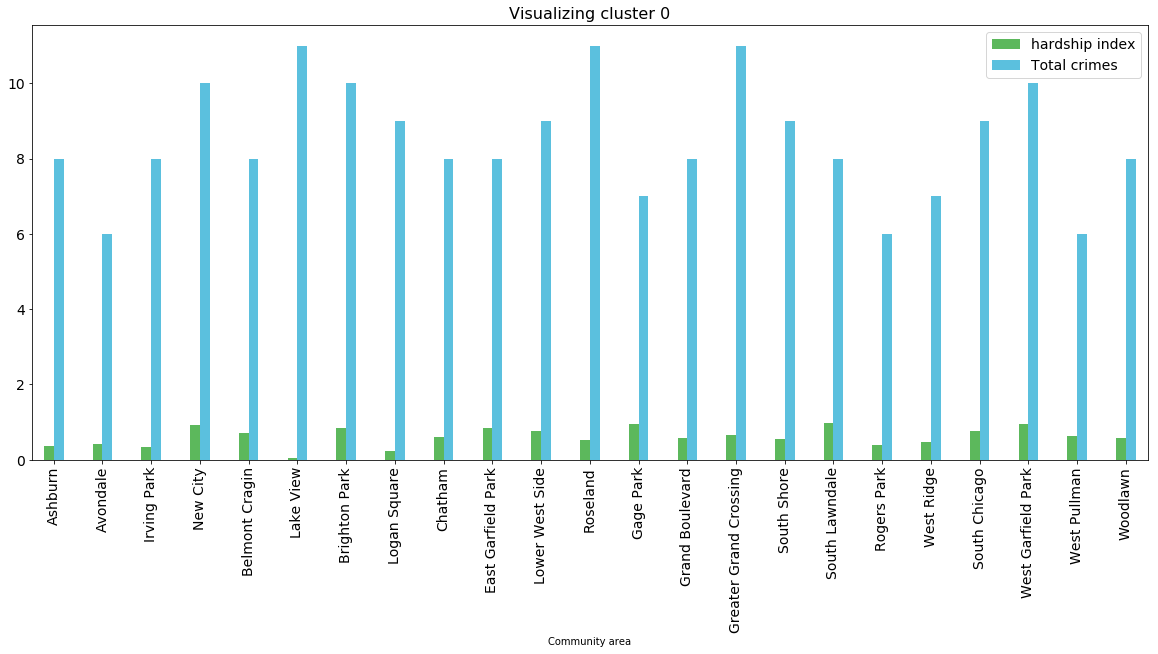

In [40]:
ax = ca_cluster0_plot.plot(kind='bar', 
             figsize=(20, 8),
             width = 0.4,
             color = ('#5cb85c', '#5bc0de'),
             fontsize = 14)
ax.set_title("Visualizing cluster 0", 
             fontsize = 16)
ax.legend(fontsize = 14)

### Visualizing cluster 2

In [41]:
ca_cluster2_plot = ca_cluster2.drop(columns = ['Cluster Labels','1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue'])
ca_cluster2_plot.set_index('Community area', inplace=True)

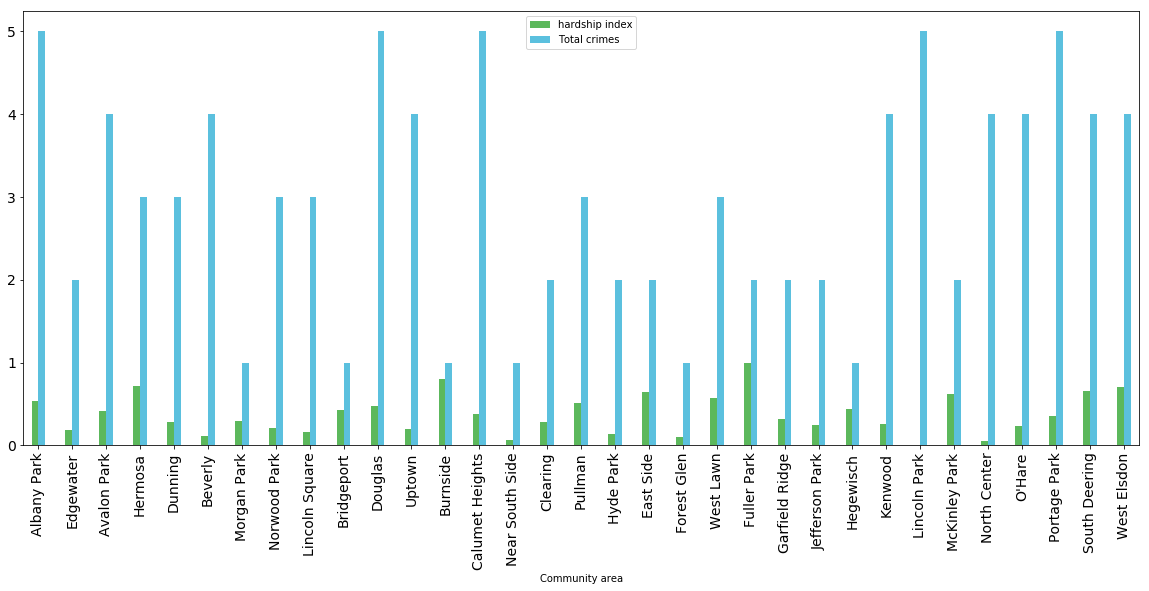

In [42]:
ax1 = ca_cluster2_plot.plot(kind='bar', 
             figsize=(20, 8),
             width = 0.4,
             color = ('#5cb85c', '#5bc0de'),
             fontsize = 14)
ax.set_title("Visualizing cluster 2", 
             fontsize = 16)
ax.legend(fontsize = 14)